# import

In [99]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy.stats
from statsmodels.stats.proportion import proportions_ztest

import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import statsmodels.api as sm

from sklearn.tree import export_graphviz
# import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

matplotlib.rc('font', family = 'NanumGothic')
matplotlib.rc('axes', unicode_minus = False)

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from statsmodels.tools.eval_measures import rmse

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
# from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from xgboost import plot_importance
# from lightgbm import LGBMClassifier
# from lightgbm import plot_importance
# from catboost import CatBoostClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve, auc

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# 데이터 전처리

## 데이터 불러오기

In [229]:
df = pd.read_csv("/home/piai/bigdata/실습화일/2. Big Data 분석/SCALE불량.csv", encoding='euc-kr')
df.head()

plate_no        rolling_date scale   spec_long spec_country steel_kind  \
0  PLT_1001  03JAN2023:07:07:53    양품  AB/EH32-TM           미국          T   
1  PLT_1002  03JAN2023:07:21:22    양품  AB/EH32-TM           미국          T   
2  PLT_1003  03JAN2023:07:31:15    양품   NV-E36-TM           영국          T   
3  PLT_1004  03JAN2023:07:41:01    양품   NV-E36-TM           영국          T   
4  PLT_1005  03JAN2023:07:52:40    양품  BV-EH36-TM          프랑스          T   

   pt_thick  pt_width  pt_length hsb  ... fur_heat_temp fur_heat_time  \
0        32      3700      15100  적용  ...          1144           116   
1        32      3700      15100  적용  ...          1144           122   
2        33      3600      19200  적용  ...          1129           116   
3        33      3600      19200  적용  ...          1152           125   
4        38      3100      13300  적용  ...          1140           134   

   fur_soak_temp  fur_soak_time  fur_total_time  fur_ex_temp  rolling_method  \
0           1133             59             259         1133      TMCP(온도제어)   
1           1135             53             238         1135      TMCP(온도제어)   
2           1121             55             258         1121      TMCP(온도제어)   
3           1127             68             266         1127      TMCP(온도제어)   
4           1128             48             246         1128      TMCP(온도제어)   

   rolling_temp descaling_count  work_group  
0           934               8          1조  
1           937               8          1조  
2           889               8          1조  
3           885               8          1조  
4           873               8          1조  

[5 rows x 22 columns]

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  fur_ex_temp      1000 non-null   i

## 결측치 조회

In [231]:
df.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

## 이상치 탐지

In [232]:
# 이상치 탐지를 위한 연속형 변수 데이터 프레임
df_con = df[["pt_thick","pt_width","pt_length","fur_heat_temp","fur_heat_time",
             "fur_soak_temp","fur_soak_time","fur_total_time","fur_ex_temp","rolling_temp","descaling_count"]]

/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/piai/an

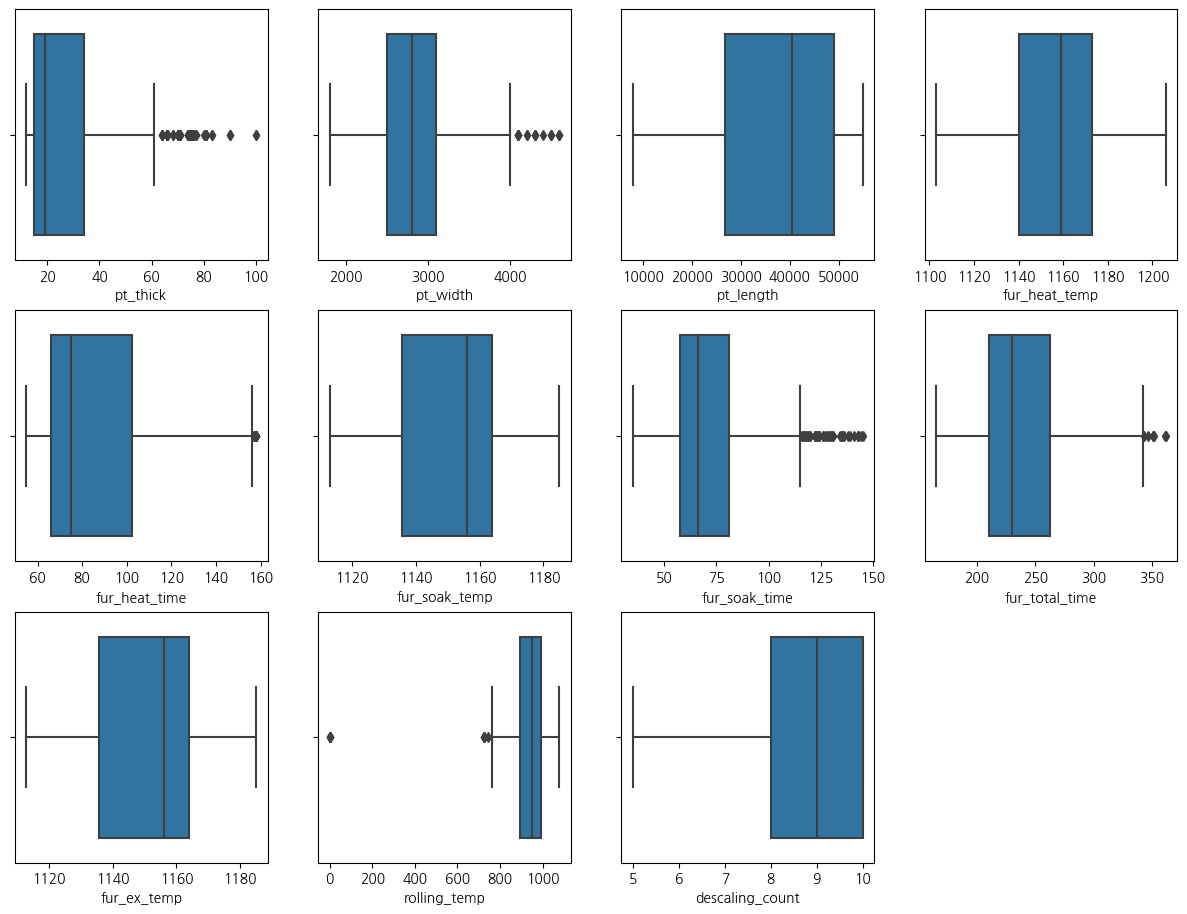

In [233]:
plt.figure(figsize=(15, 15))

for idx, col in enumerate(list(df_con)):
    plt.subplot(4, 4, idx+1)
    sns.boxplot(df_con[col])

+ rolling_temp = 0인 이상치가 관측된다. -> 제거

In [234]:
df["rolling_temp"].sort_values().head(10)

221      0
53       0
599      0
600      0
222      0
598      0
632    723
633    723
631    723
634    723
Name: rolling_temp, dtype: int64

In [235]:
df["rolling_temp"] = df["rolling_temp"].fillna(df.mean()["rolling_temp"])

/tmp/ipykernel_18622/2326833127.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["rolling_temp"] = df["rolling_temp"].fillna(df.mean()["rolling_temp"])


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  fur_ex_temp      1000 non-null   i

+ 이상치 평균으로 대체

## 파생변수 추가

1. fur_free_heat_time = fur_total_time - (fur_heat_time+fur_soak_time) : 예열대 재류시간
2. heat_input = fur_heat_time * fur_heat_temp : 가열대 총 열 입력량
3. soak_input = fur_soak_time * fur_soak_temp : 균일대 총 열 입력량
4. fur_no_row : fur_no와 fur_input_row의 조합의 종류로 1호기 1열, 1호기 2열, 2호기 1열, 2호기 2열, 3호기 1열, 3호기 2열로 6개의 범주를 가지는 새로운 범주형 변수
5. plate_volume : 후판 부피
6. plate_area : 후판 넓이
7. temp_dif = fur_ex_temp - rolling_temp : 가열로 추출온도와 압연온도의 차이
8. work_time : rolling_date를 일자는 무시하고 시간만 봐서 0 ~ 4시, 4 ~ 8시, 8 ~ 12시, 12 ~ 16시, 16 ~ 20시, 20 ~ 24시로 4시간 간격의 범주로 바꾼 새로운 범주형 변수

In [237]:
# 파생변수 생성
df['fur_free_heat_time'] = df['fur_total_time'] - (df['fur_heat_time'] + df['fur_soak_time'])
df['heat_input'] = df['fur_heat_time'] * df['fur_heat_temp']
df['soak_input'] = df['fur_soak_time'] * df['fur_soak_temp']

df['fur_no_row'] = df['fur_no'] + ' ' + df['fur_input_row']

df['plate_volume'] = df['pt_length'] * df['pt_width'] * df['pt_thick']
df['plate_area'] = df['pt_width'] * df['pt_thick']
df['temp_dif'] = df['fur_ex_temp'] - df['rolling_temp']

df['rolling_datetime'] = pd.to_datetime(df['rolling_date'], format='%d%b%Y:%H:%M:%S')
df['work_time'] = pd.cut(df['rolling_datetime'].dt.hour, bins=[0, 4, 8, 12, 16, 20, 24], labels=['0-4', '4-8', '8-12', '12-16', '16-20', '20-24'])

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   plate_no            1000 non-null   object        
 1   rolling_date        1000 non-null   object        
 2   scale               1000 non-null   object        
 3   spec_long           1000 non-null   object        
 4   spec_country        1000 non-null   object        
 5   steel_kind          1000 non-null   object        
 6   pt_thick            1000 non-null   int64         
 7   pt_width            1000 non-null   int64         
 8   pt_length           1000 non-null   int64         
 9   hsb                 1000 non-null   object        
 10  fur_no              1000 non-null   object        
 11  fur_input_row       1000 non-null   object        
 12  fur_heat_temp       1000 non-null   int64         
 13  fur_heat_time       1000 non-null   int64        

## 필요없는 변수 삭제

In [239]:
df.drop(['rolling_date','rolling_datetime','plate_no','fur_no','fur_input_row'],axis=1, inplace=True)

In [240]:
df.drop(['spec_country'], axis=1, inplace=True)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   scale               1000 non-null   object  
 1   spec_long           1000 non-null   object  
 2   steel_kind          1000 non-null   object  
 3   pt_thick            1000 non-null   int64   
 4   pt_width            1000 non-null   int64   
 5   pt_length           1000 non-null   int64   
 6   hsb                 1000 non-null   object  
 7   fur_heat_temp       1000 non-null   int64   
 8   fur_heat_time       1000 non-null   int64   
 9   fur_soak_temp       1000 non-null   int64   
 10  fur_soak_time       1000 non-null   int64   
 11  fur_total_time      1000 non-null   int64   
 12  fur_ex_temp         1000 non-null   int64   
 13  rolling_method      1000 non-null   object  
 14  rolling_temp        1000 non-null   int64   
 15  descaling_count     1000 non-null   int

## 범주형 df_cat, 연속형 df_con 으로 나누기

In [244]:
df_cat = df[['scale', 'spec_long', 'steel_kind', 'hsb', 
        'rolling_method', 'work_group', 'fur_no_row', 'work_time']]

In [246]:
df_con = df.drop(['scale', 'spec_long', 'steel_kind', 'hsb', 
        'rolling_method', 'work_group', 'fur_no_row', 'work_time'], axis=1)

In [247]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   scale           1000 non-null   object  
 1   spec_long       1000 non-null   object  
 2   steel_kind      1000 non-null   object  
 3   hsb             1000 non-null   object  
 4   rolling_method  1000 non-null   object  
 5   work_group      1000 non-null   object  
 6   fur_no_row      1000 non-null   object  
 7   work_time       956 non-null    category
dtypes: category(1), object(7)
memory usage: 56.0+ KB


In [248]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   pt_thick            1000 non-null   int64
 1   pt_width            1000 non-null   int64
 2   pt_length           1000 non-null   int64
 3   fur_heat_temp       1000 non-null   int64
 4   fur_heat_time       1000 non-null   int64
 5   fur_soak_temp       1000 non-null   int64
 6   fur_soak_time       1000 non-null   int64
 7   fur_total_time      1000 non-null   int64
 8   fur_ex_temp         1000 non-null   int64
 9   rolling_temp        1000 non-null   int64
 10  descaling_count     1000 non-null   int64
 11  fur_free_heat_time  1000 non-null   int64
 12  heat_input          1000 non-null   int64
 13  soak_input          1000 non-null   int64
 14  plate_volume        1000 non-null   int64
 15  plate_area          1000 non-null   int64
 16  temp_dif            1000 non-null   int64
d

# 탐색적 분석 EDA

## 범주형 목표변수 scale과 각 범주형 설명변수간의 카이제곱 검정

범주형 목표변수 scale과 각 범주형 설명변수간의 카이제곱 검정의 귀무가설  
H0: 목표변수와 해당 설명번수는 상관관계가 없다.  
p-value < 0.05 라면 유의수준 5%에서 해당 귀무가설은 기각되고 대립가설 H1 이 채택된다.  
H1: 목표변수와 해당 설명변수는 관련성이 있다.  

In [249]:
from scipy.stats import chi2_contingency
from tabulate import tabulate

# Get the target variable and explanatory variables
target_var = 'scale'
explanatory_vars = [col for col in df_cat.columns if col != target_var]

# Loop over all explanatory variables and print chi-square tables
for var in explanatory_vars:
    contingency_table = pd.crosstab(df_cat[var], df_cat[target_var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    table = tabulate(contingency_table, headers='keys', tablefmt='pipe', showindex=True)
    exp_freq = tabulate(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns), headers='keys', tablefmt='pipe', showindex=True)
    print(f'{var}:\nContingency table:\n{table}\nExpected frequencies:\n{exp_freq}\n')
    print(f'{var}: chi-square={chi2:.2f}, p-value={p:.4f}\n\n')

spec_long:
Contingency table:
| spec_long   |   불량 |   양품 |
|:------------|-------:|-------:|
| A131-DH36TM |      1 |      0 |
| A283-C      |      5 |      1 |
| A516-60     |      2 |      1 |
| A709-36     |      0 |      1 |
| AB/A        |     13 |     38 |
| AB/AH32     |      8 |     23 |
| AB/B        |      3 |      6 |
| AB/EH32-TM  |      0 |      2 |
| AB/EH36-TM  |      2 |     30 |
| API-2W-50T  |      0 |      2 |
| BV-A        |      4 |     15 |
| BV-AH32     |      9 |     25 |
| BV-AH32-TM  |      0 |      4 |
| BV-AH36-TL  |      1 |      2 |
| BV-AH36-TM  |      1 |      0 |
| BV-B        |     10 |     24 |
| BV-EH32-TM  |      0 |      7 |
| BV-EH36-TM  |      2 |     37 |
| CCS-B       |      2 |      0 |
| COMMON      |      3 |     33 |
| GL-A        |      6 |     11 |
| GL-A32      |      2 |     22 |
| GL-A32-TM   |      1 |      3 |
| GL-A36-TM   |      0 |     11 |
| GL-D36-TM   |      2 |      7 |
| GL-E32-TM   |      1 |      5 |
| GL-E36-TM   |      1

- p-value를 통해 상관관계를 서술하겠다.
   
- 목표변수 'scale' 과 설명변수 'spec_long' 은 관련성이 있다.
- 목표변수 'scale' 과 설명변수 'spec_country' 은 관련성이 있다.
- 목표변수 'scale' 과 설명변수 'steel_kind' 은 관련성이 있다.
- 목표변수 'scale' 과 설명변수 'hsb' 은 관련성이 있다.
- 목표변수 'scale' 과 설명변수 'rolling_method' 은 관련성이 있다.
- 목표변수 'scale' 과 설명변수 'work_group' 은 관련성이 있다.
- 목표변수 'scale' 과 설명변수 'fur_no_row' 은 관련성이 없다.
- 목표변수 'scale' 과 설명변수 'work_time' 은 관련성이 있다.
  
결과적으로 설명변수 fur_no_row(몇 호기 몇 열인지 범주) 만 목표변수 scale(양품인지 불량인지 여부)와 관련성이 없는 것으로 나타났다.

In [250]:
# fur_no_row 제거
df_cat.drop(['fur_no_row'], axis=1, inplace=True)

/tmp/ipykernel_18622/767402123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop(['fur_no_row'], axis=1, inplace=True)


In [251]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   scale           1000 non-null   object  
 1   spec_long       1000 non-null   object  
 2   steel_kind      1000 non-null   object  
 3   hsb             1000 non-null   object  
 4   rolling_method  1000 non-null   object  
 5   work_group      1000 non-null   object  
 6   work_time       956 non-null    category
dtypes: category(1), object(6)
memory usage: 48.2+ KB


## 연속형 데이터 상관분석

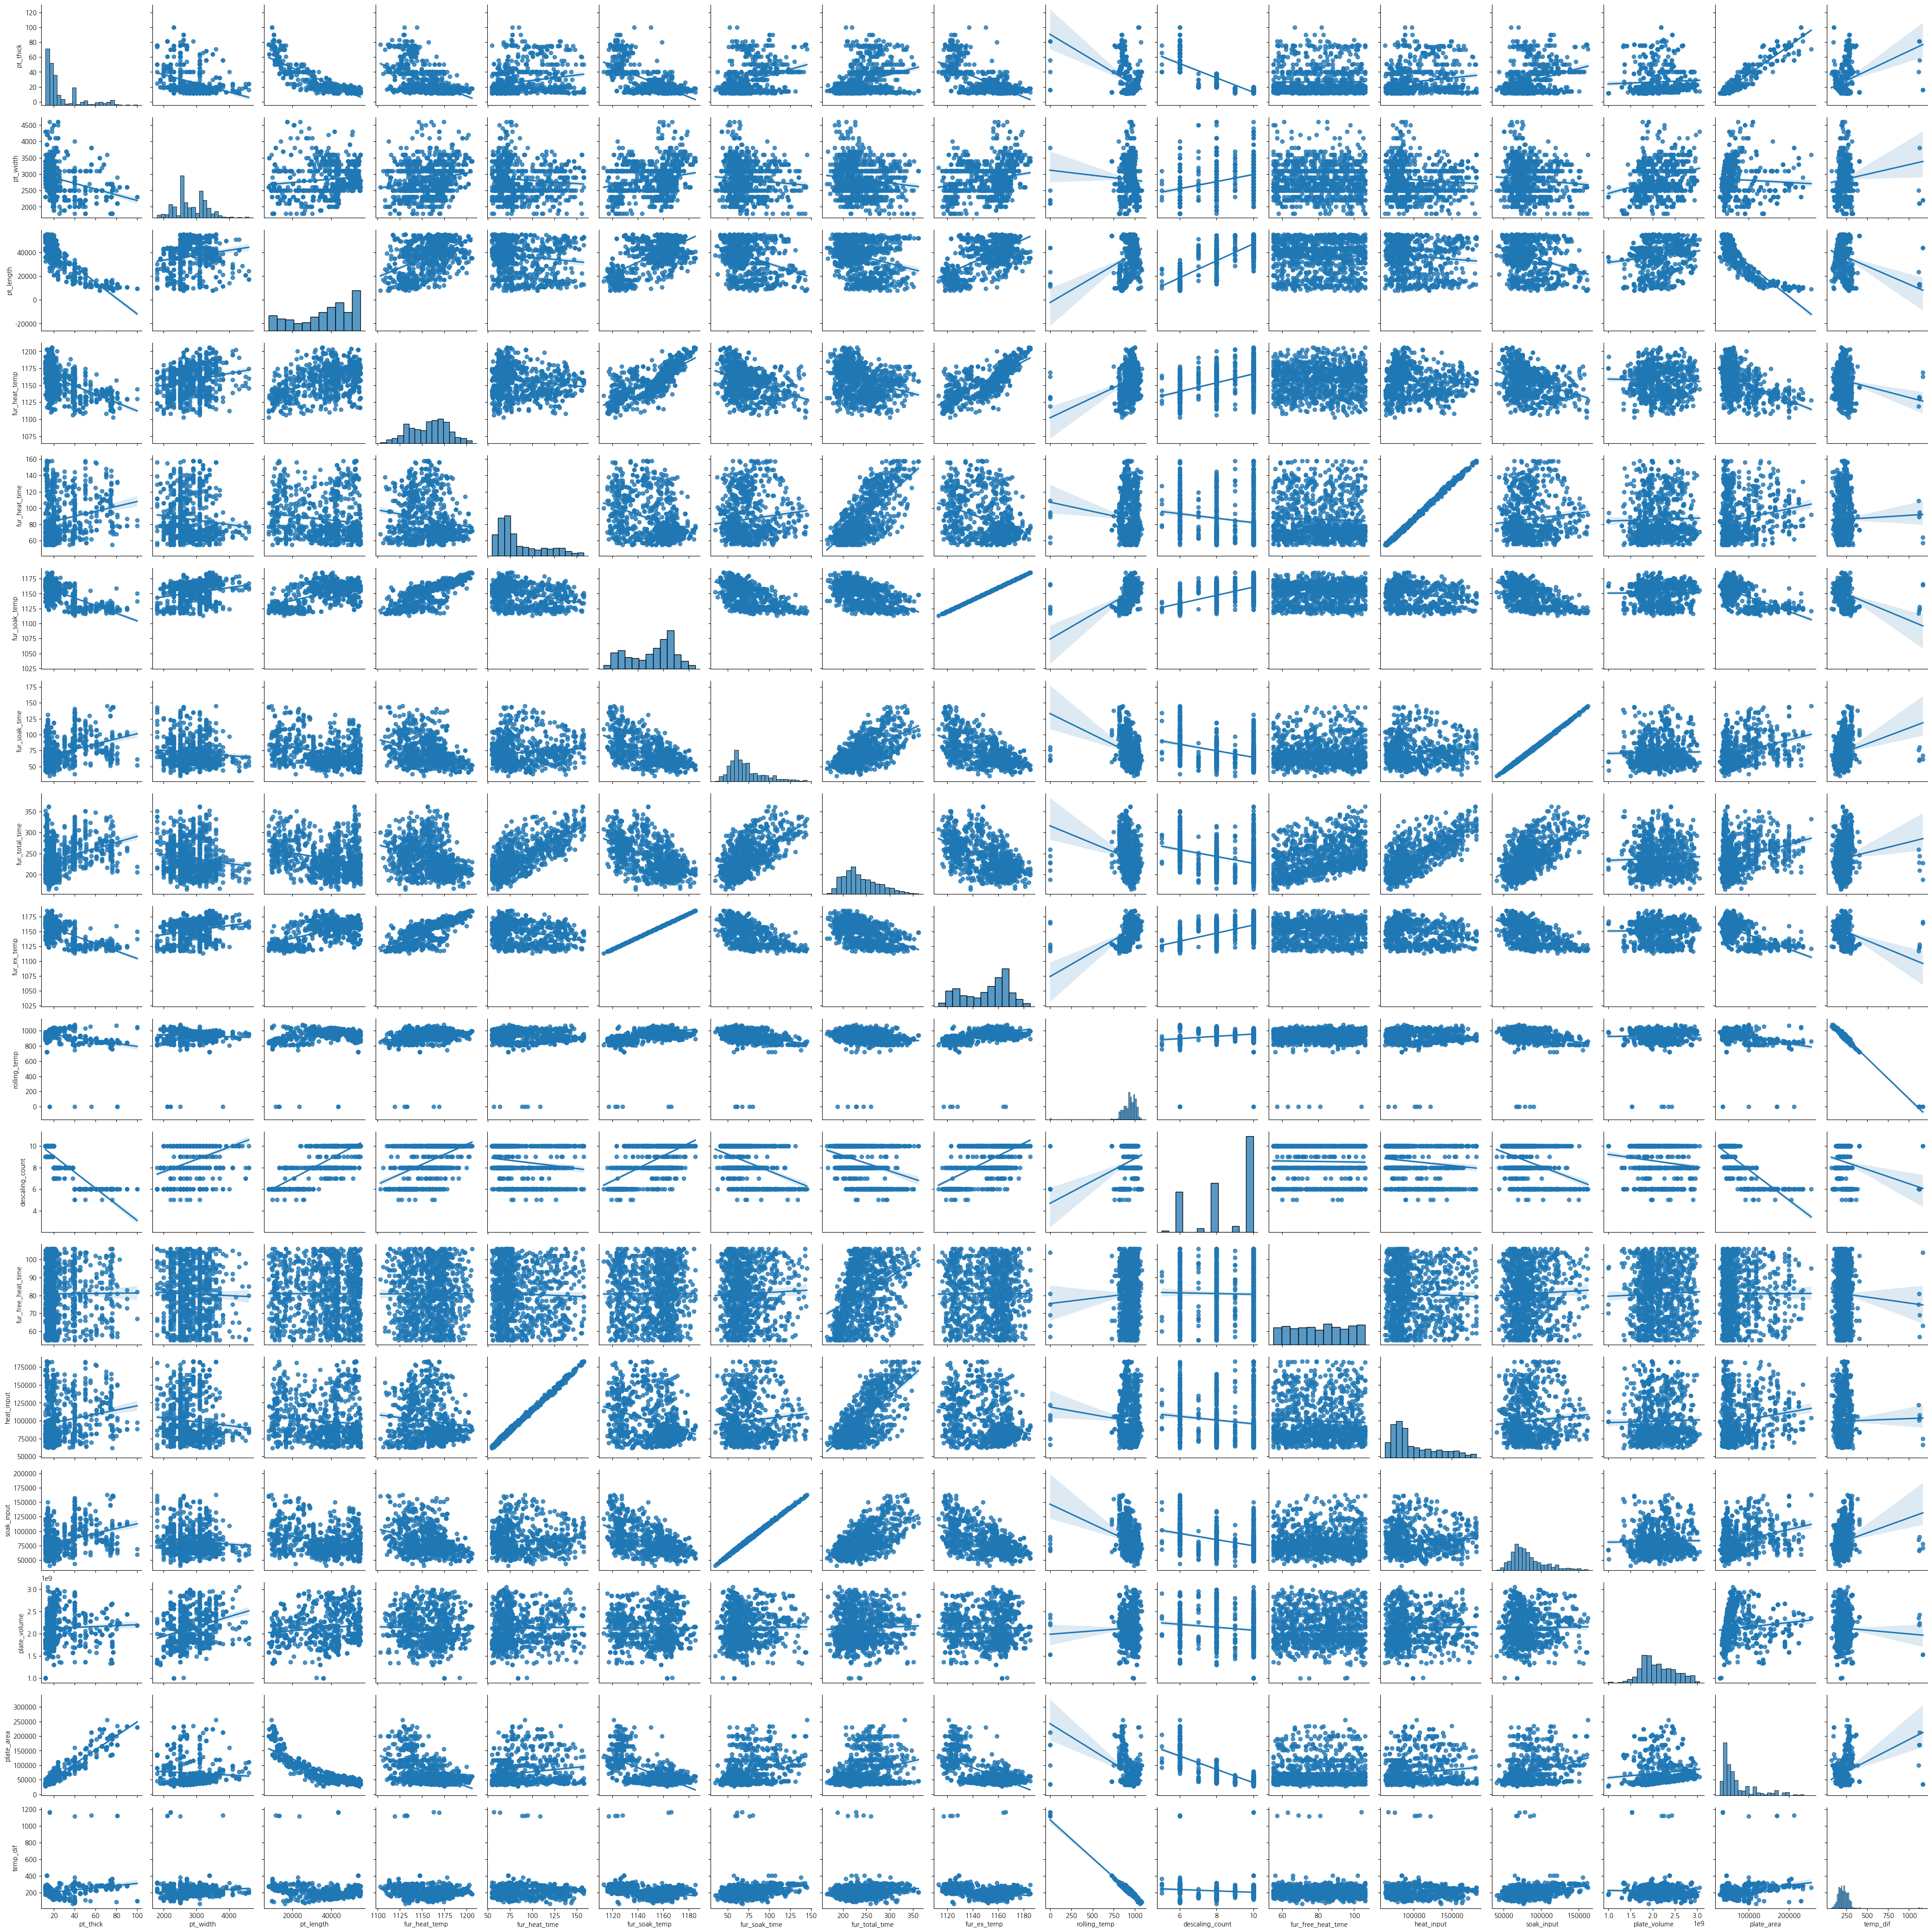

In [252]:
# 데이터의 상관관계를 볼 수 있도록 시각화
sns.pairplot(df_con, kind="reg")
plt.show()

In [253]:
# 상관계수 출력
df_con.corr().round(3)

pt_thick  pt_width  pt_length  fur_heat_temp  \
pt_thick               1.000    -0.320     -0.867         -0.525   
pt_width              -0.320     1.000      0.148          0.201   
pt_length             -0.867     0.148      1.000          0.471   
fur_heat_temp         -0.525     0.201      0.471          1.000   
fur_heat_time          0.207    -0.101     -0.138         -0.164   
fur_soak_temp         -0.666     0.217      0.603          0.787   
fur_soak_time          0.357    -0.097     -0.334         -0.373   
fur_total_time         0.338    -0.133     -0.276         -0.314   
fur_ex_temp           -0.666     0.217      0.603          0.787   
rolling_temp          -0.363    -0.060      0.291          0.269   
descaling_count       -0.845     0.350      0.818          0.488   
fur_free_heat_time     0.007    -0.029     -0.003          0.002   
heat_input             0.176    -0.089     -0.109         -0.108   
soak_input             0.332    -0.090     -0.310         -0.345   
plate_volume           0.050     0.287      0.130         -0.029   
plate_area             0.953    -0.063     -0.881         -0.503   
temp_dif               0.262     0.107     -0.196         -0.137   

                    fur_heat_time  fur_soak_temp  fur_soak_time  \
pt_thick                    0.207         -0.666          0.357   
pt_width                   -0.101          0.217         -0.097   
pt_length                  -0.138          0.603         -0.334   
fur_heat_temp              -0.164          0.787         -0.373   
fur_heat_time               1.000         -0.349          0.115   
fur_soak_temp              -0.349          1.000         -0.597   
fur_soak_time               0.115         -0.597          1.000   
fur_total_time              0.736         -0.561          0.633   
fur_ex_temp                -0.349          1.000         -0.597   
rolling_temp               -0.083          0.459         -0.308   
descaling_count            -0.167          0.628         -0.399   
fur_free_heat_time         -0.040          0.005          0.037   
heat_input                  0.998         -0.307          0.097   
soak_input                  0.101         -0.562          0.999   
plate_volume                0.025          0.004          0.022   
plate_area                  0.178         -0.640          0.348   
temp_dif                    0.022         -0.300          0.216   

                    fur_total_time  fur_ex_temp  rolling_temp  \
pt_thick                     0.338       -0.666        -0.363   
pt_width                    -0.133        0.217        -0.060   
pt_length                   -0.276        0.603         0.291   
fur_heat_temp               -0.314        0.787         0.269   
fur_heat_time                0.736       -0.349        -0.083   
fur_soak_temp               -0.561        1.000         0.459   
fur_soak_time                0.633       -0.597        -0.308   
fur_total_time               1.000       -0.561        -0.209   
fur_ex_temp                 -0.561        1.000         0.459   
rolling_temp                -0.209        0.459         1.000   
descaling_count             -0.339        0.628         0.250   
fur_free_heat_time           0.385        0.005         0.038   
heat_input                   0.725       -0.307        -0.068   
soak_input                   0.623       -0.562        -0.292   
plate_volume                 0.041        0.004         0.038   
plate_area                   0.311       -0.640        -0.385   
temp_dif                     0.116       -0.300        -0.985   

                    descaling_count  fur_free_heat_time  heat_input  \
pt_thick                     -0.845               0.007       0.176   
pt_width                      0.350              -0.029      -0.089   
pt_length                     0.818              -0.003      -0.109   
fur_heat_temp                 0.488               0.002      -0.108   
fur_heat_time                -0.167              -0.040       

<AxesSubplot:>

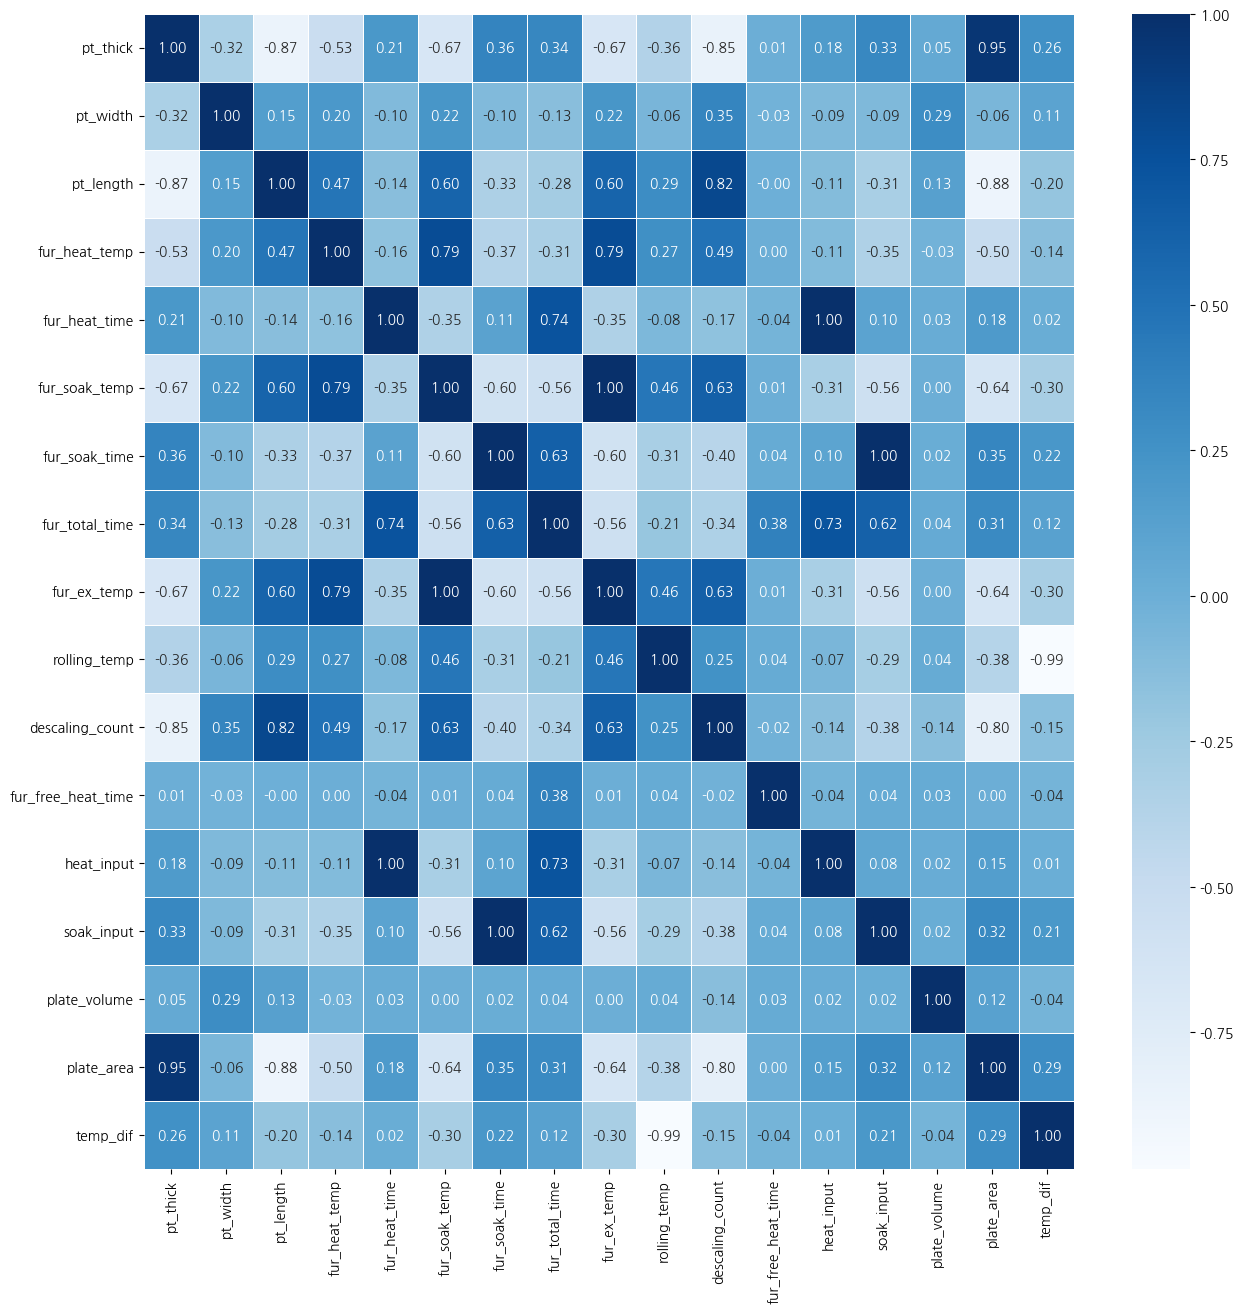

In [254]:
# 상관계수 시각화
plt.figure(figsize=(15,15))
sns.heatmap(data = df_con.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 다중공선성 해결과 유의성 검정

변수들의 scale이 너무 다르기에, 분석이 원할하지 않을 수 있다.
그렇기에 먼저 scale 변환을 진행한다.

In [255]:
v_feature_name = df_con.columns

scaler = StandardScaler()
df_con_scaled = scaler.fit_transform(df_con)
df_con_scaled = pd.DataFrame(df_con_scaled, columns=v_feature_name)
df_con_scaled.head()

pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  fur_soak_temp  \
0  0.287834  1.757877  -1.559693      -0.623753       1.140313      -1.034166   
1  0.287834  1.757877  -1.559693      -0.623753       1.368163      -0.918797   
2  0.342996  1.555380  -1.264844      -1.330154       1.140313      -1.726379   
3  0.342996  1.555380  -1.264844      -0.247005       1.482088      -1.380272   
4  0.618805  0.542895  -1.689139      -0.812126       1.823863      -1.322588   

   fur_soak_time  fur_total_time  fur_ex_temp  rolling_temp  descaling_count  \
0      -0.617721        0.534659    -1.034166     -0.006598        -0.347396   
1      -0.909098       -0.015429    -0.918797      0.024474        -0.347396   
2      -0.811972        0.508464    -1.726379     -0.472679        -0.347396   
3      -0.180654        0.718022    -1.380272     -0.514108        -0.347396   
4      -1.151913        0.194129    -1.322588     -0.638397        -0.347396   

   fur_free_heat_time  heat_input  soak_input  plate_volume  plate_area  \
0            0.207225    1.104748   -0.681263     -0.893400    0.996322   
1           -1.195200    1.332432   -0.975687     -0.893400    0.996322   
2            0.407572    1.047031   -0.909693      0.407132    1.005096   
3           -0.527379    1.479445   -0.250582      0.407132    1.005096   
4           -1.128418    1.770020   -1.240150     -1.476519    0.983160   

   temp_dif  
0 -0.192298  
1 -0.203420  
2  0.174705  
3  0.285918  
4  0.430495

## 변수 유의성 검정 : p_value > 0.05 제거

In [256]:
df_log_model = df_con_scaled

In [257]:
df_log_model["scale"] = df_cat_dummy["scale_양품"]

In [258]:
df_log_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pt_thick            1000 non-null   float64
 1   pt_width            1000 non-null   float64
 2   pt_length           1000 non-null   float64
 3   fur_heat_temp       1000 non-null   float64
 4   fur_heat_time       1000 non-null   float64
 5   fur_soak_temp       1000 non-null   float64
 6   fur_soak_time       1000 non-null   float64
 7   fur_total_time      1000 non-null   float64
 8   fur_ex_temp         1000 non-null   float64
 9   rolling_temp        1000 non-null   float64
 10  descaling_count     1000 non-null   float64
 11  fur_free_heat_time  1000 non-null   float64
 12  heat_input          1000 non-null   float64
 13  soak_input          1000 non-null   float64
 14  plate_volume        1000 non-null   float64
 15  plate_area          1000 non-null   float64
 16  temp_di

In [259]:
for i in range(len(df_log_model.columns)-1):
    log_model = Logit.from_formula("scale ~ {}".format
                                   (column_names[i].replace("\'", "")) , df_log_model)
    log_result = log_model.fit()

    print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.614011
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Mar 2023   Pseudo R-squ.:                0.008221
Time:                        03:02:02   Log-Likelihood:                -614.01
converged:                       True   LL-Null:                       -619.10
Covariance Type:            nonrobust   LLR p-value:                  0.001420
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8111      0.069     11.739      0.000       0.676       0.947
pt_thick       0.2322      0.

"pt_length", "fur_heat_time", "descaling_count", "fur_free_heat_time", "heat_input", "plate_volume" 를 제거해야 한다.

In [260]:
df_con_scaled = df_con_scaled.drop(["pt_length", "fur_heat_time", "descaling_count",
                                    "fur_free_heat_time", "heat_input", "plate_volume"], axis=1)

## VIF > 10 이상 제거

In [261]:
df_con_scaled = df_con_scaled.drop(["fur_soak_temp", "fur_ex_temp", "fur_soak_time", "rolling_temp", "plate_area"], axis =1)
df_con_scaled_const = add_constant(df_con_scaled)

df_vif = pd.DataFrame()
df_vif["variable"] = df_con_scaled_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_con_scaled_const, i) for i in 
                 range(df_con_scaled_const.shape[1])]
df_vif.sort_values("VIF", ascending = False).round(2)

variable   VIF
0           const  3.78
5      soak_input  1.77
4  fur_total_time  1.70
1        pt_thick  1.67
3   fur_heat_temp  1.51
7           scale  1.25
6        temp_dif  1.24
2        pt_width  1.21

In [262]:
df_con_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pt_thick        1000 non-null   float64
 1   pt_width        1000 non-null   float64
 2   fur_heat_temp   1000 non-null   float64
 3   fur_total_time  1000 non-null   float64
 4   soak_input      1000 non-null   float64
 5   temp_dif        1000 non-null   float64
 6   scale           1000 non-null   uint8  
dtypes: float64(6), uint8(1)
memory usage: 48.0 KB


- VIF > 10 인 변수를 차례대로 삭제하였다.

In [263]:
df_con_scaled = df_con_scaled.drop(["scale"], axis=1)

In [264]:
df_con_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pt_thick        1000 non-null   float64
 1   pt_width        1000 non-null   float64
 2   fur_heat_temp   1000 non-null   float64
 3   fur_total_time  1000 non-null   float64
 4   soak_input      1000 non-null   float64
 5   temp_dif        1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


### df_cat 더미화

In [265]:
df_cat_dummy = pd.get_dummies(df_cat)
df_cat_dummy.head()

scale_불량  scale_양품  spec_long_A131-DH36TM  spec_long_A283-C  \
0         0         1                      0                 0   
1         0         1                      0                 0   
2         0         1                      0                 0   
3         0         1                      0                 0   
4         0         1                      0                 0   

   spec_long_A516-60  spec_long_A709-36  spec_long_AB/A  spec_long_AB/AH32  \
0                  0                  0               0                  0   
1                  0                  0               0                  0   
2                  0                  0               0                  0   
3                  0                  0               0                  0   
4                  0                  0               0                  0   

   spec_long_AB/B  spec_long_AB/EH32-TM  ...  work_group_1조  work_group_2조  \
0               0                     1  ...              1              0   
1               0                     1  ...              1              0   
2               0                     0  ...              1              0   
3               0                     0  ...              1              0   
4               0                     0  ...              1              0   

   work_group_3조  work_group_4조  work_time_0-4  work_time_4-8  work_time_8-12  \
0              0              0              0              1               0   
1              0              0              0              1               0   
2              0              0              0              1               0   
3              0              0              0              1               0   
4              0              0              0              1               0   

   work_time_12-16  work_time_16-20  work_time_20-24  
0                0                0                0  
1                0                0                0  
2                0                0                0  
3                0                0                0  
4                0                0                0  

[5 rows x 84 columns]

In [266]:
# 양품을 1으로 하는 더미변수만 필요하기에 scale_불량 제거
df_cat_dummy.drop(["scale_불량"], axis=1, inplace=True)

In [267]:
df_cat_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 83 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   scale_양품                   1000 non-null   uint8
 1   spec_long_A131-DH36TM      1000 non-null   uint8
 2   spec_long_A283-C           1000 non-null   uint8
 3   spec_long_A516-60          1000 non-null   uint8
 4   spec_long_A709-36          1000 non-null   uint8
 5   spec_long_AB/A             1000 non-null   uint8
 6   spec_long_AB/AH32          1000 non-null   uint8
 7   spec_long_AB/B             1000 non-null   uint8
 8   spec_long_AB/EH32-TM       1000 non-null   uint8
 9   spec_long_AB/EH36-TM       1000 non-null   uint8
 10  spec_long_API-2W-50T       1000 non-null   uint8
 11  spec_long_BV-A             1000 non-null   uint8
 12  spec_long_BV-AH32          1000 non-null   uint8
 13  spec_long_BV-AH32-TM       1000 non-null   uint8
 14  spec_long_BV-AH36-TL     

In [268]:
df_cat_dummy.reset_index(drop=True)
df_con_scaled.reset_index(drop=True)

pt_thick  pt_width  fur_heat_temp  fur_total_time  soak_input  temp_dif
0    0.287834  1.757877      -0.623753        0.534659   -0.681263 -0.192298
1    0.287834  1.757877      -0.623753       -0.015429   -0.975687 -0.203420
2    0.342996  1.555380      -1.330154        0.508464   -0.909693  0.174705
3    0.342996  1.555380      -0.247005        0.718022   -0.250582  0.285918
4    0.618805  0.542895      -0.812126        0.194129   -1.240150  0.430495
..        ...       ...            ...             ...         ...       ...
995 -0.429269  1.150386      -0.717939       -0.932242    0.732738 -0.147813
996 -0.429269  1.150386      -0.717939       -0.775074    0.732738 -0.147813
997 -0.539592  1.150386       0.553583       -0.303570    0.317632 -0.014358
998 -0.539592  1.150386       0.553583       -0.906047    0.317632 -0.014358
999 -0.594754  1.150386       1.354172       -0.801268   -1.307860 -0.047722

[1000 rows x 6 columns]

### concat으로 합쳐서 df 선언

In [269]:
df_raw = pd.concat([df_cat_dummy, df_con_scaled], axis=1)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 89 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   scale_양품                   1000 non-null   uint8  
 1   spec_long_A131-DH36TM      1000 non-null   uint8  
 2   spec_long_A283-C           1000 non-null   uint8  
 3   spec_long_A516-60          1000 non-null   uint8  
 4   spec_long_A709-36          1000 non-null   uint8  
 5   spec_long_AB/A             1000 non-null   uint8  
 6   spec_long_AB/AH32          1000 non-null   uint8  
 7   spec_long_AB/B             1000 non-null   uint8  
 8   spec_long_AB/EH32-TM       1000 non-null   uint8  
 9   spec_long_AB/EH36-TM       1000 non-null   uint8  
 10  spec_long_API-2W-50T       1000 non-null   uint8  
 11  spec_long_BV-A             1000 non-null   uint8  
 12  spec_long_BV-AH32          1000 non-null   uint8  
 13  spec_long_BV-AH32-TM       1000 non-null   uint8 

### df의 test train 분리

In [270]:
df_x = df_raw.drop(["scale_양품"], axis=1)
df_y = df_raw["scale_양품"]

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=3000)

# EDA 시각화

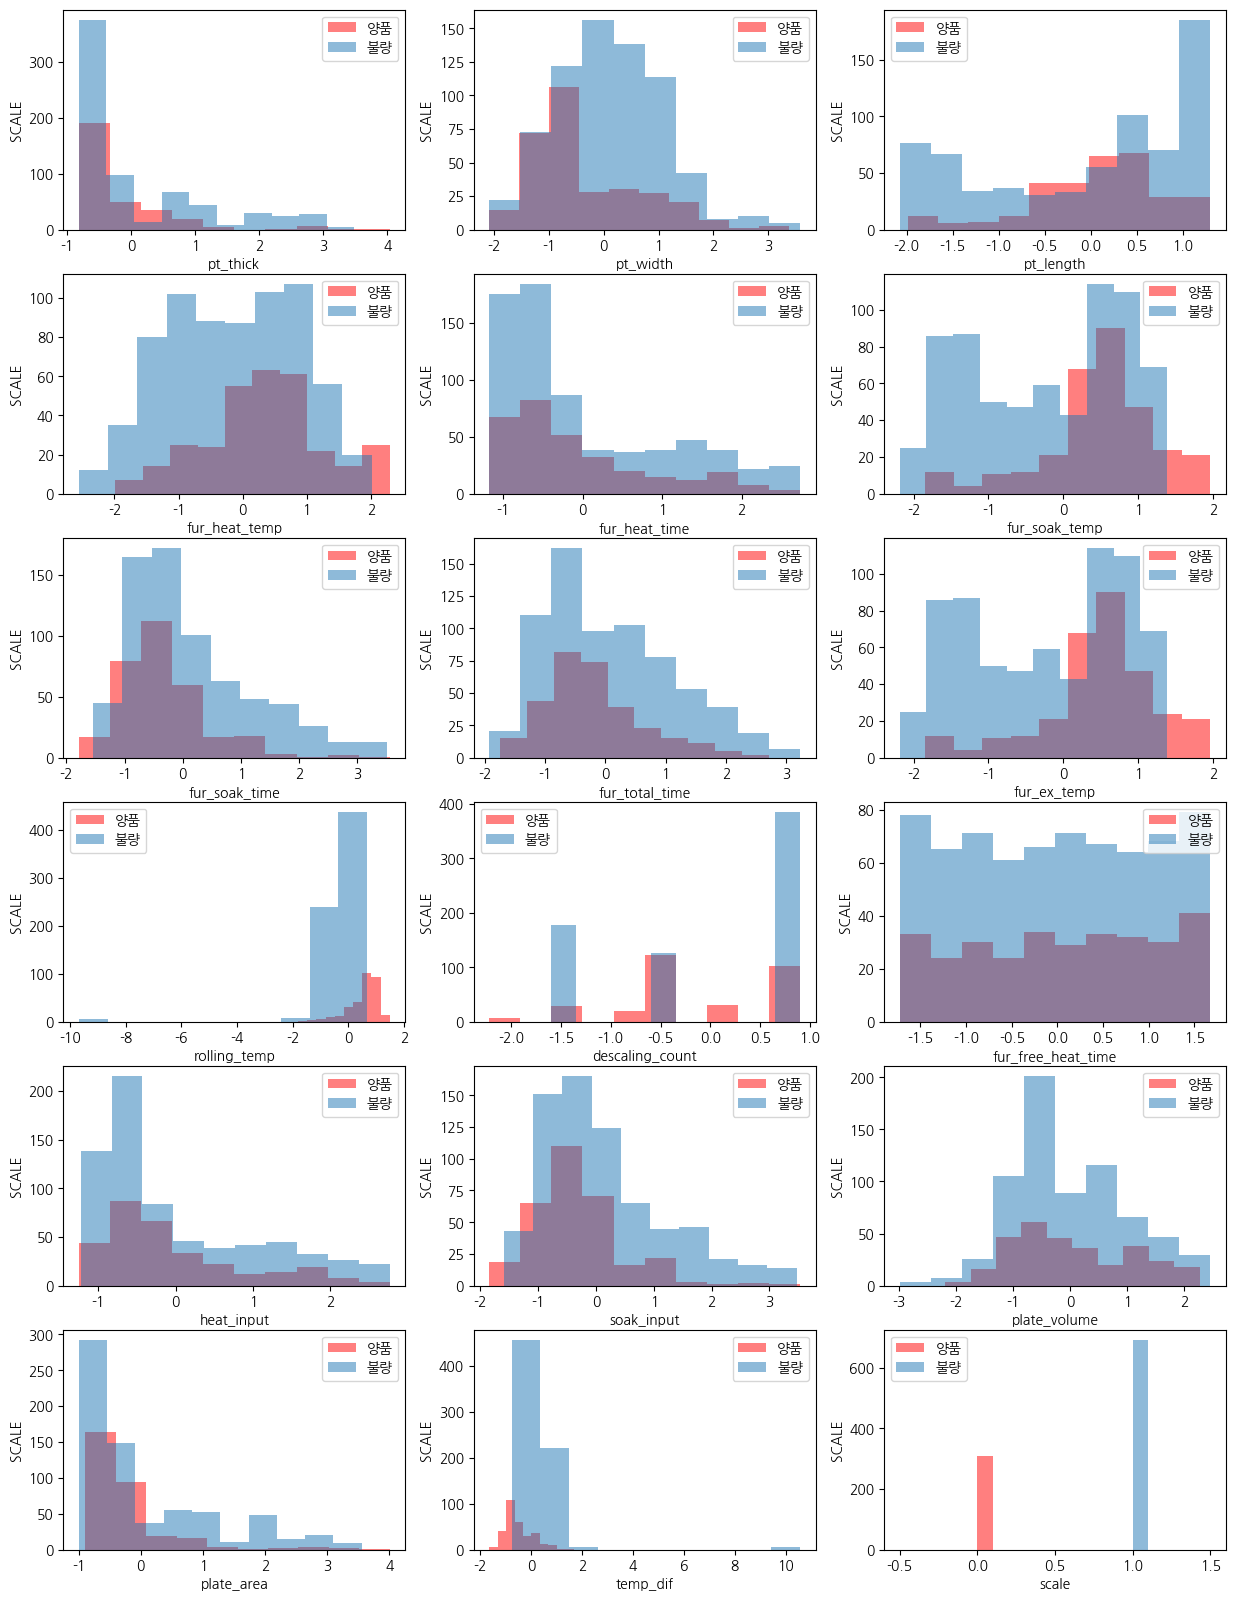

In [335]:
i = 0
fig = plt.figure(figsize = (15, 20))
columns = df_log_model.columns
for col in df_log_model.columns:
    plt.subplot(df_log_model.shape[1]//3, 3, i+1)
    i += 1
    plt.hist(df_log_model[df_log_model["scale"] == 0][col], label = "양품", alpha = 0.5, color='red')
    plt.hist(df_log_model[df_log_model["scale"] == 1][col], label = "불량", alpha = 0.5)
    plt.xlabel(col)
    plt.ylabel("SCALE")
    plt.legend()
plt.show()

# Decision Tree

In [271]:
tree_uncustomized = DecisionTreeClassifier(random_state=3000)
tree_uncustomized.fit(df_train_x,df_train_y)
y_pred = tree_uncustomized.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_uncustomized.score(df_test_x,df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy: 0.893

Confusion matrix: 
[[ 70  17]
 [ 15 198]]


# Random Forest

In [272]:
rf_uncustomized = RandomForestClassifier(random_state=3000)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Score on train set:{0:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{0:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on train set:1.000
Score on test set:0.913


# 서포트 벡터 머신

In [273]:
from sklearn.svm import SVC

svm_uncustomized = SVC(random_state=3000)
svm_uncustomized.fit(df_train_x, df_train_y)
print("Score on train set:{0:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{0:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Score on train set:0.913
Score on test set:0.893


# 그래디언트 부스팅 기반 기법들

## Gradient Boost

In [274]:
gb_uncustomized = GradientBoostingClassifier(random_state=3000)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on train set:{0:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{0:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Accuracy on train set:0.967
Accuracy on test set:0.930


## XG Boost

In [275]:
xgboost_uncust = XGBClassifier(random_state=3000)
xgboost_uncust.fit(df_train_x, df_train_y)
print("Accuracy on train set:{0:.3f}".format(xgboost_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set:{0:.3f}".format(xgboost_uncust.score(df_test_x,df_test_y)))

Accuracy on train set:1.000
Accuracy on test set:0.930


## LightGBM

In [276]:
lgbm_uncust = LGBMClassifier(random_state=3000)
lgbm_uncust.fit(df_train_x, df_train_y)
print("Accuracy on train set:{0:.3f}".format(lgbm_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set:{0:.3f}".format(lgbm_uncust.score(df_test_x,df_test_y)))

Accuracy on train set:1.000
Accuracy on test set:0.940


## CatBoost

In [277]:
cbc_uncust = CatBoostClassifier(random_state=3000)
cbc_uncust.fit(df_train_x, df_train_y)
print("Accuracy on train set:{0:.3f}".format(cbc_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set:{0:.3f}".format(cbc_uncust.score(df_test_x,df_test_y)))

Learning rate set to 0.008847
0:	learn: 0.6844956	total: 3.02ms	remaining: 3.01s
1:	learn: 0.6749062	total: 5.77ms	remaining: 2.88s
2:	learn: 0.6653888	total: 8.31ms	remaining: 2.76s
3:	learn: 0.6569187	total: 10.7ms	remaining: 2.65s
4:	learn: 0.6493679	total: 12.7ms	remaining: 2.53s
5:	learn: 0.6408497	total: 14.9ms	remaining: 2.48s
6:	learn: 0.6327220	total: 17ms	remaining: 2.41s
7:	learn: 0.6251760	total: 18.7ms	remaining: 2.32s
8:	learn: 0.6168905	total: 20.6ms	remaining: 2.27s
9:	learn: 0.6093399	total: 22.4ms	remaining: 2.21s
10:	learn: 0.6020935	total: 24.1ms	remaining: 2.17s
11:	learn: 0.5952347	total: 25.9ms	remaining: 2.13s
12:	learn: 0.5880639	total: 27.6ms	remaining: 2.1s
13:	learn: 0.5812659	total: 29.2ms	remaining: 2.05s
14:	learn: 0.5755488	total: 30ms	remaining: 1.97s
15:	learn: 0.5695610	total: 31.5ms	remaining: 1.94s
16:	learn: 0.5630524	total: 33.7ms	remaining: 1.95s
17:	learn: 0.5568557	total: 35.2ms	remaining: 1.92s
18:	learn: 0.5496430	total: 36.8ms	remaining: 1.9

# 인공 신경망

In [278]:
nn_uncustomized = MLPClassifier(random_state=3000)
nn_uncustomized.fit(df_train_x, df_train_y)
print("Score on train set:{0:.3f}".format(nn_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{0:.3f}".format(nn_uncustomized.score(df_test_x,df_test_y)))

Score on train set:0.976
Score on test set:0.877


/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# KNN

In [279]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)
print("Score on train set:{0:.3f}".format(knn_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{0:.3f}".format(knn_uncustomized.score(df_test_x,df_test_y)))

Score on train set:0.870
Score on test set:0.853


/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

# GridsearchCV 파라미터 선택

In [280]:
# 그리드서치를 위한 각 모델들의 조회할 파라미터 지정
models = {
    'DecisionTreeClassifier': (DecisionTreeClassifier(),{'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 20]}),
    'RandomForestClassifier': (RandomForestClassifier(), {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, 20, None]}),
    'SVC': (SVC(), {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}),
    'GradientBoostingClassifier': (GradientBoostingClassifier(), {'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 10]}),
    'XGBClassifier': (XGBClassifier(), {'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 10]}),
    'LGBMClassifier': (LGBMClassifier(), {'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 10]}),
    'CatBoostClassifier': (CatBoostClassifier(verbose=False), {'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 10]}),
    'MLPClassifier': (MLPClassifier(), {'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)], 'alpha': [0.0001, 0.001, 0.01]}),
    'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']})
}

# 각 모델마다 그리드서치 실행 및 결과 출력
for model_name, (model, param_grid) in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    clf = GridSearchCV(model, param_grid, cv=5)
    clf.fit(df_train_x, df_train_y.values.ravel())
    print(f"Best parameters: {clf.best_params_}")
    print(f"Train score: {clf.best_score_}")
    print(f"Test score: {clf.score(df_test_x, df_test_y.values.ravel())}")

Running GridSearchCV for DecisionTreeClassifier...
Best parameters: {'criterion': 'gini', 'max_depth': 5}
Train score: 0.9199999999999999
Test score: 0.9166666666666666
Running GridSearchCV for RandomForestClassifier...
Best parameters: {'max_depth': None, 'n_estimators': 500}
Train score: 0.9328571428571429
Test score: 0.92
Running GridSearchCV for SVC...
Best parameters: {'C': 1, 'kernel': 'rbf'}
Train score: 0.8800000000000001
Test score: 0.8933333333333333
Running GridSearchCV for GradientBoostingClassifier...
Best parameters: {'learning_rate': 0.01, 'max_depth': 3}
Train score: 0.9271428571428573
Test score: 0.9233333333333333
Running GridSearchCV for XGBClassifier...
Best parameters: {'learning_rate': 0.1, 'max_depth': 10}
Train score: 0.9357142857142856
Test score: 0.93
Running GridSearchCV for LGBMClassifier...
Best parameters: {'learning_rate': 1, 'max_depth': 5}
Train score: 0.9342857142857144
Test score: 0.92
Running GridSearchCV for CatBoostClassifier...
Best parameters: {'

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages

Best parameters: {'alpha': 0.01, 'hidden_layer_sizes': (50,)}
Train score: 0.8828571428571429
Test score: 0.8866666666666667
Running GridSearchCV for KNeighborsClassifier...
Best parameters: {'n_neighbors': 7, 'weights': 'distance'}
Train score: 0.8242857142857144
Test score: 0.8466666666666667


/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# 기능 선택 후의 정확도가 더 낮아졌다. 그렇기에 최소한으로 제거하고 돌려보겠다.

In [281]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   pt_thick            1000 non-null   int64
 1   pt_width            1000 non-null   int64
 2   pt_length           1000 non-null   int64
 3   fur_heat_temp       1000 non-null   int64
 4   fur_heat_time       1000 non-null   int64
 5   fur_soak_temp       1000 non-null   int64
 6   fur_soak_time       1000 non-null   int64
 7   fur_total_time      1000 non-null   int64
 8   fur_ex_temp         1000 non-null   int64
 9   rolling_temp        1000 non-null   int64
 10  descaling_count     1000 non-null   int64
 11  fur_free_heat_time  1000 non-null   int64
 12  heat_input          1000 non-null   int64
 13  soak_input          1000 non-null   int64
 14  plate_volume        1000 non-null   int64
 15  plate_area          1000 non-null   int64
 16  temp_dif            1000 non-null   int64
d

In [282]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   scale           1000 non-null   object  
 1   spec_long       1000 non-null   object  
 2   steel_kind      1000 non-null   object  
 3   hsb             1000 non-null   object  
 4   rolling_method  1000 non-null   object  
 5   work_group      1000 non-null   object  
 6   work_time       956 non-null    category
dtypes: category(1), object(6)
memory usage: 48.2+ KB


In [284]:
v_feature_name = df_con.columns

scaler = StandardScaler()
df_con_scaled2 = scaler.fit_transform(df_con)
df_con_scaled2 = pd.DataFrame(df_con_scaled2, columns=v_feature_name)
df_con_scaled2.head()

pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  fur_soak_temp  \
0  0.287834  1.757877  -1.559693      -0.623753       1.140313      -1.034166   
1  0.287834  1.757877  -1.559693      -0.623753       1.368163      -0.918797   
2  0.342996  1.555380  -1.264844      -1.330154       1.140313      -1.726379   
3  0.342996  1.555380  -1.264844      -0.247005       1.482088      -1.380272   
4  0.618805  0.542895  -1.689139      -0.812126       1.823863      -1.322588   

   fur_soak_time  fur_total_time  fur_ex_temp  rolling_temp  descaling_count  \
0      -0.617721        0.534659    -1.034166     -0.006598        -0.347396   
1      -0.909098       -0.015429    -0.918797      0.024474        -0.347396   
2      -0.811972        0.508464    -1.726379     -0.472679        -0.347396   
3      -0.180654        0.718022    -1.380272     -0.514108        -0.347396   
4      -1.151913        0.194129    -1.322588     -0.638397        -0.347396   

   fur_free_heat_time  heat_input  soak_input  plate_volume  plate_area  \
0            0.207225    1.104748   -0.681263     -0.893400    0.996322   
1           -1.195200    1.332432   -0.975687     -0.893400    0.996322   
2            0.407572    1.047031   -0.909693      0.407132    1.005096   
3           -0.527379    1.479445   -0.250582      0.407132    1.005096   
4           -1.128418    1.770020   -1.240150     -1.476519    0.983160   

   temp_dif  
0 -0.192298  
1 -0.203420  
2  0.174705  
3  0.285918  
4  0.430495

In [287]:
df_cat_dummy2 = pd.get_dummies(df_cat)
df_cat_dummy2.head()

scale_불량  scale_양품  spec_long_A131-DH36TM  spec_long_A283-C  \
0         0         1                      0                 0   
1         0         1                      0                 0   
2         0         1                      0                 0   
3         0         1                      0                 0   
4         0         1                      0                 0   

   spec_long_A516-60  spec_long_A709-36  spec_long_AB/A  spec_long_AB/AH32  \
0                  0                  0               0                  0   
1                  0                  0               0                  0   
2                  0                  0               0                  0   
3                  0                  0               0                  0   
4                  0                  0               0                  0   

   spec_long_AB/B  spec_long_AB/EH32-TM  ...  work_group_1조  work_group_2조  \
0               0                     1  ...              1              0   
1               0                     1  ...              1              0   
2               0                     0  ...              1              0   
3               0                     0  ...              1              0   
4               0                     0  ...              1              0   

   work_group_3조  work_group_4조  work_time_0-4  work_time_4-8  work_time_8-12  \
0              0              0              0              1               0   
1              0              0              0              1               0   
2              0              0              0              1               0   
3              0              0              0              1               0   
4              0              0              0              1               0   

   work_time_12-16  work_time_16-20  work_time_20-24  
0                0                0                0  
1                0                0                0  
2                0                0                0  
3                0                0                0  
4                0                0                0  

[5 rows x 84 columns]

In [288]:
# 이번에는 불량품을 잡아낼 수 있도록 불량을 1로 양품을 0으로 하겠다.
df_cat_dummy2.drop(["scale_양품"], axis=1, inplace=True)

In [289]:
df_raw = pd.concat([df_cat_dummy2, df_con_scaled2], axis=1)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 100 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   scale_불량                   1000 non-null   uint8  
 1   spec_long_A131-DH36TM      1000 non-null   uint8  
 2   spec_long_A283-C           1000 non-null   uint8  
 3   spec_long_A516-60          1000 non-null   uint8  
 4   spec_long_A709-36          1000 non-null   uint8  
 5   spec_long_AB/A             1000 non-null   uint8  
 6   spec_long_AB/AH32          1000 non-null   uint8  
 7   spec_long_AB/B             1000 non-null   uint8  
 8   spec_long_AB/EH32-TM       1000 non-null   uint8  
 9   spec_long_AB/EH36-TM       1000 non-null   uint8  
 10  spec_long_API-2W-50T       1000 non-null   uint8  
 11  spec_long_BV-A             1000 non-null   uint8  
 12  spec_long_BV-AH32          1000 non-null   uint8  
 13  spec_long_BV-AH32-TM       1000 non-null   uint8

In [292]:
df_x = df_raw.drop(["scale_불량"], axis=1)
df_y = df_raw["scale_불량"]

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=3000)

In [293]:
tree_uncustomized = DecisionTreeClassifier(random_state=3000)
tree_uncustomized.fit(df_train_x,df_train_y)
y_pred = tree_uncustomized.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_uncustomized.score(df_test_x,df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy: 0.917

Confusion matrix: 
[[199  14]
 [ 11  76]]


In [294]:
rf_uncustomized = RandomForestClassifier(random_state=3000)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Score on train set:{0:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{0:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on train set:1.000
Score on test set:0.947


In [295]:
from sklearn.svm import SVC

svm_uncustomized = SVC(random_state=3000)
svm_uncustomized.fit(df_train_x, df_train_y)
print("Score on train set:{0:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{0:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Score on train set:0.909
Score on test set:0.893


In [296]:
gb_uncustomized = GradientBoostingClassifier(random_state=3000)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on train set:{0:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{0:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Accuracy on train set:1.000
Accuracy on test set:0.990


In [297]:
xgboost_uncust = XGBClassifier(random_state=3000)
xgboost_uncust.fit(df_train_x, df_train_y)
print("Accuracy on train set:{0:.3f}".format(xgboost_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set:{0:.3f}".format(xgboost_uncust.score(df_test_x,df_test_y)))

Accuracy on train set:1.000
Accuracy on test set:0.990


In [298]:
lgbm_uncust = LGBMClassifier(random_state=3000)
lgbm_uncust.fit(df_train_x, df_train_y)
print("Accuracy on train set:{0:.3f}".format(lgbm_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set:{0:.3f}".format(lgbm_uncust.score(df_test_x,df_test_y)))

Accuracy on train set:1.000
Accuracy on test set:1.000


In [299]:
cbc_uncust = CatBoostClassifier(random_state=3000)
cbc_uncust.fit(df_train_x, df_train_y)
print("Accuracy on train set:{0:.3f}".format(cbc_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set:{0:.3f}".format(cbc_uncust.score(df_test_x,df_test_y)))

Learning rate set to 0.008847
0:	learn: 0.6788177	total: 4.66ms	remaining: 4.66s
1:	learn: 0.6653008	total: 9.31ms	remaining: 4.65s
2:	learn: 0.6525012	total: 13.9ms	remaining: 4.62s
3:	learn: 0.6421918	total: 17.4ms	remaining: 4.34s
4:	learn: 0.6316072	total: 19.9ms	remaining: 3.96s
5:	learn: 0.6212807	total: 22.3ms	remaining: 3.69s
6:	learn: 0.6112131	total: 26.6ms	remaining: 3.77s
7:	learn: 0.6003919	total: 28.6ms	remaining: 3.54s
8:	learn: 0.5892140	total: 30.5ms	remaining: 3.36s
9:	learn: 0.5802046	total: 32.8ms	remaining: 3.25s
10:	learn: 0.5697297	total: 35.1ms	remaining: 3.15s
11:	learn: 0.5590700	total: 37ms	remaining: 3.05s
12:	learn: 0.5501617	total: 39ms	remaining: 2.96s
13:	learn: 0.5404186	total: 42.1ms	remaining: 2.96s
14:	learn: 0.5302842	total: 43.9ms	remaining: 2.88s
15:	learn: 0.5233724	total: 45.8ms	remaining: 2.82s
16:	learn: 0.5150237	total: 47.7ms	remaining: 2.76s
17:	learn: 0.5028782	total: 49.7ms	remaining: 2.71s
18:	learn: 0.4947319	total: 52ms	remaining: 2.68

In [300]:
nn_uncustomized = MLPClassifier(random_state=3000)
nn_uncustomized.fit(df_train_x, df_train_y)
print("Score on train set:{0:.3f}".format(nn_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{0:.3f}".format(nn_uncustomized.score(df_test_x,df_test_y)))

Score on train set:0.990
Score on test set:0.883


/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [301]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)
print("Score on train set:{0:.3f}".format(knn_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{0:.3f}".format(knn_uncustomized.score(df_test_x,df_test_y)))

Score on train set:0.873
Score on test set:0.877


/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [302]:
# 그리드서치를 위한 각 모델들의 조회할 파라미터 지정
models = {
    'DecisionTreeClassifier': (DecisionTreeClassifier(),{'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 20]}),
    'RandomForestClassifier': (RandomForestClassifier(), {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, 20, None]}),
    'SVC': (SVC(), {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}),
    'GradientBoostingClassifier': (GradientBoostingClassifier(), {'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 10]}),
    'XGBClassifier': (XGBClassifier(), {'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 10]}),
    'LGBMClassifier': (LGBMClassifier(), {'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 10]}),
    'CatBoostClassifier': (CatBoostClassifier(verbose=False), {'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 10]}),
    'MLPClassifier': (MLPClassifier(), {'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)], 'alpha': [0.0001, 0.001, 0.01]}),
    'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']})
}

# 각 모델마다 그리드서치 실행 및 결과 출력
for model_name, (model, param_grid) in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    clf = GridSearchCV(model, param_grid, cv=5)
    clf.fit(df_train_x, df_train_y.values.ravel())
    print(f"Best parameters: {clf.best_params_}")
    print(f"Train score: {clf.best_score_}")
    print(f"Test score: {clf.score(df_test_x, df_test_y.values.ravel())}")

Running GridSearchCV for DecisionTreeClassifier...
Best parameters: {'criterion': 'entropy', 'max_depth': None}
Train score: 0.99
Test score: 1.0
Running GridSearchCV for RandomForestClassifier...
Best parameters: {'max_depth': 20, 'n_estimators': 200}
Train score: 0.9585714285714285
Test score: 0.9466666666666667
Running GridSearchCV for SVC...
Best parameters: {'C': 10, 'kernel': 'rbf'}
Train score: 0.8857142857142858
Test score: 0.89
Running GridSearchCV for GradientBoostingClassifier...
Best parameters: {'learning_rate': 0.1, 'max_depth': 3}
Train score: 0.9814285714285715
Test score: 0.9866666666666667
Running GridSearchCV for XGBClassifier...
Best parameters: {'learning_rate': 0.1, 'max_depth': 10}
Train score: 0.99
Test score: 0.9933333333333333
Running GridSearchCV for LGBMClassifier...
Best parameters: {'learning_rate': 0.1, 'max_depth': 5}
Train score: 0.9942857142857143
Test score: 1.0
Running GridSearchCV for CatBoostClassifier...
Best parameters: {'learning_rate': 0.1, 'ma

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages

Best parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50)}
Train score: 0.8814285714285713
Test score: 0.8633333333333333
Running GridSearchCV for KNeighborsClassifier...
Best parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Train score: 0.8271428571428571
Test score: 0.8633333333333333


/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

0:	learn: 0.5628433	total: 38.8ms	remaining: 38.7s
1:	learn: 0.4607714	total: 53ms	remaining: 26.4s
2:	learn: 0.3809963	total: 73.6ms	remaining: 24.5s
3:	learn: 0.3109041	total: 91.3ms	remaining: 22.7s
4:	learn: 0.2651975	total: 113ms	remaining: 22.5s
5:	learn: 0.2340225	total: 127ms	remaining: 21s
6:	learn: 0.2079781	total: 141ms	remaining: 20s
7:	learn: 0.1854257	total: 153ms	remaining: 19s
8:	learn: 0.1651413	total: 164ms	remaining: 18s
9:	learn: 0.1527380	total: 177ms	remaining: 17.5s
10:	learn: 0.1346390	total: 190ms	remaining: 17.1s
11:	learn: 0.1146332	total: 201ms	remaining: 16.6s
12:	learn: 0.1038053	total: 214ms	remaining: 16.2s
13:	learn: 0.0953106	total: 227ms	remaining: 16s
14:	learn: 0.0913803	total: 228ms	remaining: 15s
15:	learn: 0.0777663	total: 240ms	remaining: 14.8s
16:	learn: 0.0741365	total: 252ms	remaining: 14.6s
17:	learn: 0.0717322	total: 254ms	remaining: 13.8s
18:	learn: 0.0685130	total: 266ms	remaining: 13.7s
19:	learn: 0.0645659	total: 277ms	remaining: 13.6s


/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/tmp/ipykernel_18622/3374561486.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models.keys(), rotation=90)


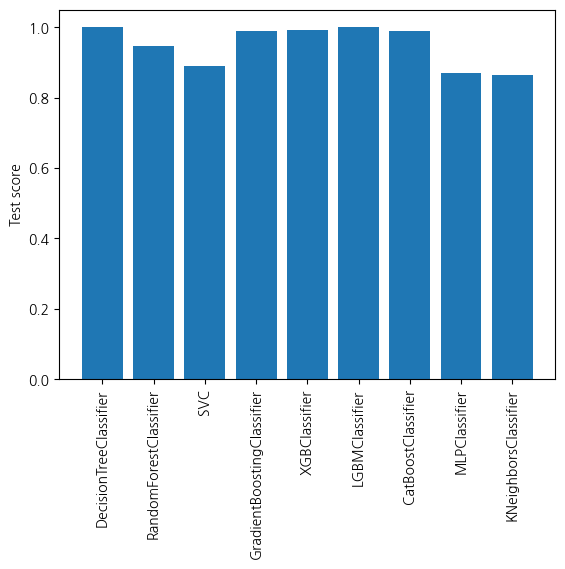

In [303]:
# Define the models and their corresponding best estimators
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion= 'entropy', max_depth= None),
    'RandomForestClassifier': RandomForestClassifier(max_depth= 20, n_estimators= 200),
    'SVC': SVC(C= 10, kernel= 'rbf'),
    'GradientBoostingClassifier': GradientBoostingClassifier(learning_rate= 0.1, max_depth = 3),
    'XGBClassifier': XGBClassifier(learning_rate = 0.1, max_depth = 10),
    'LGBMClassifier': LGBMClassifier(learning_rate = 0.1, max_depth = 5),
    'CatBoostClassifier': CatBoostClassifier(learning_rate = 0.1, max_depth = 10),
    'MLPClassifier': MLPClassifier(activation='relu', alpha = 0.0001, hidden_layer_sizes = (50, 50), solver='adam'),
    'KNeighborsClassifier': KNeighborsClassifier(algorithm='ball_tree', n_neighbors = 3, weights = 'uniform')
}

# Evaluate the test scores for each model
test_scores = []
for name, estimator in models.items():
    estimator.fit(df_train_x, df_train_y)
    score = estimator.score(df_test_x, df_test_y)
    test_scores.append(score)

# Plot the test scores as a bar graph
fig, ax = plt.subplots()
ax.bar(models.keys(), test_scores)
ax.set_ylabel('Test score')
ax.set_xticklabels(models.keys(), rotation=90)
plt.show()

In [325]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = best_model.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
top5_importance = df_importance[:5].round(3)
top5_importance

Feature  Importance
92  descaling_count         235
91     rolling_temp         126
82         pt_thick         118
87    fur_soak_temp          89
68          hsb_미적용          50

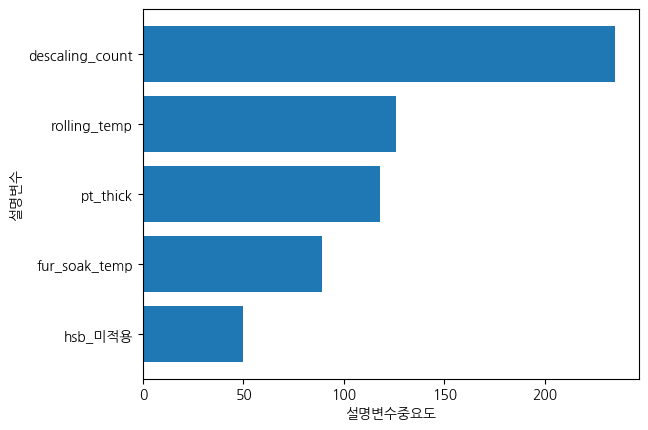

In [326]:
top5_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(top5_importance))
plt.barh(y = coordinates, width=top5_importance["Importance"])
plt.yticks(coordinates, top5_importance["Feature"])
plt.xlabel("설명변수중요도")
plt.ylabel("설명변수")
plt.show()

In [327]:
fpr, tpr, thresholds = roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)

NameError: name 'model_auc' is not defined

0:	learn: 0.5628433	total: 32.1ms	remaining: 32s
1:	learn: 0.4607714	total: 98.6ms	remaining: 49.2s
2:	learn: 0.3809963	total: 112ms	remaining: 37.3s
3:	learn: 0.3109041	total: 151ms	remaining: 37.7s
4:	learn: 0.2651975	total: 162ms	remaining: 32.2s
5:	learn: 0.2340225	total: 174ms	remaining: 28.8s
6:	learn: 0.2079781	total: 185ms	remaining: 26.3s
7:	learn: 0.1854257	total: 198ms	remaining: 24.6s
8:	learn: 0.1651413	total: 209ms	remaining: 23.1s
9:	learn: 0.1527380	total: 220ms	remaining: 21.8s
10:	learn: 0.1346390	total: 230ms	remaining: 20.7s
11:	learn: 0.1146332	total: 243ms	remaining: 20s
12:	learn: 0.1038053	total: 255ms	remaining: 19.4s
13:	learn: 0.0953106	total: 267ms	remaining: 18.8s
14:	learn: 0.0913803	total: 268ms	remaining: 17.6s
15:	learn: 0.0777663	total: 280ms	remaining: 17.2s
16:	learn: 0.0741365	total: 290ms	remaining: 16.8s
17:	learn: 0.0717322	total: 291ms	remaining: 15.9s
18:	learn: 0.0685130	total: 301ms	remaining: 15.6s
19:	learn: 0.0645659	total: 313ms	remaining

/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


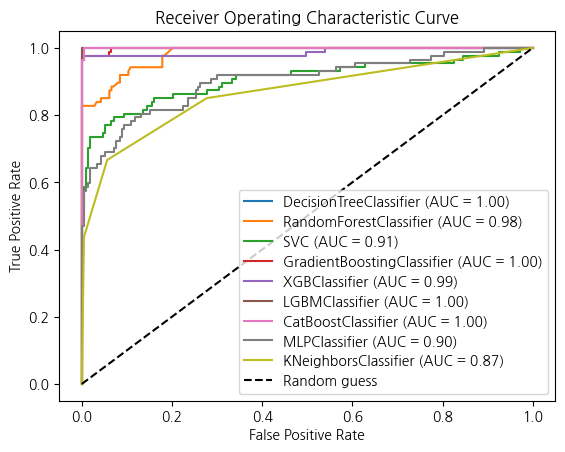

In [329]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion= 'entropy', max_depth= None),
    'RandomForestClassifier': RandomForestClassifier(max_depth= 20, n_estimators= 200),
    'SVC': SVC(C= 10, kernel= 'rbf',  probability=True),
    'GradientBoostingClassifier': GradientBoostingClassifier(learning_rate= 0.1, max_depth = 3),
    'XGBClassifier': XGBClassifier(learning_rate = 0.1, max_depth = 10),
    'LGBMClassifier': LGBMClassifier(learning_rate = 0.1, max_depth = 5),
    'CatBoostClassifier': CatBoostClassifier(learning_rate = 0.1, max_depth = 10),
    'MLPClassifier': MLPClassifier(activation='relu', alpha = 0.0001, hidden_layer_sizes = (50, 50), solver='adam'),
    'KNeighborsClassifier': KNeighborsClassifier(algorithm='ball_tree', n_neighbors = 3, weights = 'uniform')
}

# Plot the ROC curve and calculate the AUC for each model
fig, ax = plt.subplots()
for name, estimator in models.items():
    estimator.fit(df_train_x, df_train_y)
    y_score = estimator.predict_proba(df_test_x)[:, 1]
    fpr, tpr, _ = roc_curve(df_test_y, y_score)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], 'k--', label='Random guess')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic Curve')
ax.legend(loc='best')
plt.show()